### <a name='Importing-data'></a>Importing Data:


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from scipy.stats import kstest,kruskal

In [2]:
data = pd.read_csv("Chennai houseing sale.csv")
data.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0      4.0         3.9         4.9       4.330   380000  144400      7600000  
1      4.9         4.2         2.5       3.765   760122  304049     21717770  
2      4.1         3.8         2.2       3.090   421094   92114     13159200  
3      4.7         3.9         3.6       4.010   356321   77042      9630290  
4      3.0         2.5         4.1       3.290   237000   74063      7406250  

[5 rows x 22 columns]

Information about the features :

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

### <a name='Cleaning-data'></a>Cleaning Data:
the data is not clean yet , there are some issues that need to be fixed.

First, let's see if there are any null values


In [4]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

Get rid of the null values

In [5]:
data = data.dropna()
data.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

#### Reorganizing the data :

I choosed to drop some unnecessary attributes, just for optimization purposes.

In [6]:
data = data.drop('PRT_ID',axis=1)
data = data.drop('MZZONE',axis=1)

Check if the features's names are clear and easy to understand, and rename if needed.

In [7]:
data = data.rename(columns={'INT_SQFT':'PROP_SIZE'})

Fixing data formats ,espacially Date attributes needs to be in the correct format.

In [8]:
data['DATE_SALE'] = pd.to_datetime(data['DATE_SALE'], format='%d-%m-%Y', errors='coerce')
data['DATE_BUILD'] = pd.to_datetime(data['DATE_BUILD'], format='%d-%m-%Y', errors='coerce')
data['N_BATHROOM'] = data['N_BATHROOM'].astype(int)
data['N_BEDROOM'] = data['N_BEDROOM'].astype(int)
data['N_BATHROOM'] = data['N_BATHROOM'].astype(int)

Here i choosed to represent the Commission feature a percentage instead of number, to give it more context.

In [9]:
# Commission percentage
data['COMMIS_PERC'] = ((data['COMMIS']/data['SALES_PRICE'])*100).round(2)
data = data.drop('COMMIS',axis=1)

Reorganize the data by DATE_SALE then DATE_BUILD ,for more readability.

In [10]:
data = data.sort_values(['DATE_SALE','DATE_BUILD'])
data.head()

AREA  PROP_SIZE  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
3050  Velachery       1502 2004-01-16            170          2           1   
4943  Velachery       1699 2004-01-16              5          2           1   
5284  Velachery       1968 2004-01-16             51          3           2   
5757  Velachery       1541 2004-01-18            165          2           1   
2360  Velachery       1793 2004-01-26            140          2           1   

      N_ROOM    SALE_COND PARK_FACIL DATE_BUILD BUILDTYPE UTILITY_AVAIL  \
3050       4  Normal Sale         No 1950-01-29     House        NoSeWa   
4943       4     AbNormal        Yes 1953-01-28     House           ELO   
5284       5     AbNormal         No 1959-01-27    Others        AllPub   
5757       4  Normal Sale        Yes 1952-01-31    Others        AllPub   
2360       4      Partial        Yes 1953-02-07     House       NoSewr    

         STREET  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
3050  No Access       3.8          2.7         3.6        3.25   208132   
4943      Paved       2.5          2.1         4.0        2.77   263294   
5284  No Access       3.7          4.4         4.7        4.32   318946   
5757      Paved       2.9          2.2         3.9        2.89   266963   
2360  No Access       4.5          4.7         2.3        3.93   237331   

      SALES_PRICE  COMMIS_PERC  
3050      6307030          1.5  
4943      7313720          1.5  
5284      8620150          1.2  
5757      7851840          2.1  
2360      6980320          0.9

#### Perfoming EDA:
Now let's get a closer look to the data. First let's check for the range of values of each feature.

In [11]:
# checking for the unique values of the categorical features 

for column in data.columns:
  if(data[column].dtype == object ):    
    print('Feature name : ',column)
    print('the Number of unique values: ', len(data[column].unique()))
    print('Values:',data[column].unique())
    print(' ')

Feature name :  AREA
the Number of unique values:  17
Values: ['Velachery' 'Velchery' 'Chrompet' 'Adyar' 'T Nagar' 'Anna Nagar' 'Adyr'
 'KK Nagar' 'Karapakkam' 'KKNagar' 'Karapakam' 'Chormpet' 'Chrompt'
 'TNagar' 'Ana Nagar' 'Chrmpet' 'Ann Nagar']
 
Feature name :  SALE_COND
the Number of unique values:  9
Values: ['Normal Sale' 'AbNormal' 'Partial' 'Family' 'AdjLand' 'PartiaLl'
 'Adj Land' 'Ab Normal' 'Partiall']
 
Feature name :  PARK_FACIL
the Number of unique values:  3
Values: ['No' 'Yes' 'Noo']
 
Feature name :  BUILDTYPE
the Number of unique values:  5
Values: ['House' 'Others' 'Commercial' 'Other' 'Comercial']
 
Feature name :  UTILITY_AVAIL
the Number of unique values:  5
Values: ['NoSeWa' 'ELO' 'AllPub' 'NoSewr ' 'All Pub']
 
Feature name :  STREET
the Number of unique values:  5
Values: ['No Access' 'Paved' 'Gravel' 'Pavd' 'NoAccess']
 


From the output above we can see that ,there are couple of issues in the data entry .Some of the features have misspelling issue .let's fixe it. 

In [12]:
# fixing the Error

# Correct values in 'PARK_FACIL' column
data.loc[data['PARK_FACIL'] == 'Noo', 'PARK_FACIL'] = 'No'

# Correct values in 'AREA' column
data.loc[data['AREA'] == 'Velchery', 'AREA'] = 'Velachery'
data.loc[data['AREA'] == 'KKNagar', 'AREA'] = 'KK Nagar'
data.loc[data['AREA'] == 'TNagar', 'AREA'] = 'T Nagar'
data.loc[data['AREA'] == 'Ann Nagar', 'AREA'] = 'Ana Nagar'
data.loc[data['AREA'] == 'Anna Nagar', 'AREA'] = 'Ana Nagar'
data.loc[data['AREA'] == 'Chormpet', 'AREA'] = 'Chrompet'
data.loc[data['AREA'] == 'Chormpt', 'AREA'] = 'Chrompet'
data.loc[data['AREA'] == 'Chrmpet', 'AREA'] = 'Chrompet'
data.loc[data['AREA'] == 'Chrompt', 'AREA'] = 'Chrompet'
data.loc[data['AREA'] == 'Adyr', 'AREA'] = 'Adyar'
data.loc[data['AREA'] == 'Karapakkam', 'AREA'] = 'Karapakam'

# Correct values in 'SALE_COND' column
data.loc[data['SALE_COND'] == 'Normal Sale', 'SALE_COND'] = 'Normal'
data.loc[data['SALE_COND'] == 'AbNormal', 'SALE_COND'] = 'Normal'
data.loc[data['SALE_COND'] == 'Ab Normal', 'SALE_COND'] = 'Normal'
data.loc[data['SALE_COND'] == 'Partial', 'SALE_COND'] = 'Partial'
data.loc[data['SALE_COND'] == 'Partiall', 'SALE_COND'] = 'Partial'
data.loc[data['SALE_COND'] == 'PartiaLl', 'SALE_COND'] = 'Partial'
data.loc[data['SALE_COND'] == 'AdjLand', 'SALE_COND'] = 'Adj Land'

# Correct values in 'BUILDTYPE' column
data.loc[data['BUILDTYPE'] == 'Others', 'BUILDTYPE'] = 'Other'
data.loc[data['BUILDTYPE'] == 'Comercial', 'BUILDTYPE'] = 'Commercial'

# Correct values in 'UTILITY_AVAIL' column
data.loc[data['UTILITY_AVAIL'] == 'NoSeWa', 'UTILITY_AVAIL'] = 'No Sewr'
data.loc[data['UTILITY_AVAIL'] == 'NoSewr ', 'UTILITY_AVAIL'] = 'No Sewr'
data.loc[data['UTILITY_AVAIL'] == 'AllPub', 'UTILITY_AVAIL'] = 'All Pub'

# Correct values in 'STREET' column
data.loc[data['STREET'] == 'Pavd', 'STREET'] = 'Paved'
data.loc[data['STREET'] == 'NoAccess', 'STREET'] = 'No Access'

In [13]:
for column in data.columns:
  if(data[column].dtype == object ):    
    print('Feature name : ',column)
    print('the Number of unique values: ', len(data[column].unique()))
    print('Values:',data[column].unique())
    print(' ')

Feature name :  AREA
the Number of unique values:  7
Values: ['Velachery' 'Chrompet' 'Adyar' 'T Nagar' 'Ana Nagar' 'KK Nagar'
 'Karapakam']
 
Feature name :  SALE_COND
the Number of unique values:  4
Values: ['Normal' 'Partial' 'Family' 'Adj Land']
 
Feature name :  PARK_FACIL
the Number of unique values:  2
Values: ['No' 'Yes']
 
Feature name :  BUILDTYPE
the Number of unique values:  3
Values: ['House' 'Other' 'Commercial']
 
Feature name :  UTILITY_AVAIL
the Number of unique values:  3
Values: ['No Sewr' 'ELO' 'All Pub']
 
Feature name :  STREET
the Number of unique values:  3
Values: ['No Access' 'Paved' 'Gravel']
 


**Note :** this issue only happened with the categorical data .Numeric data seems to be good.

##### Summary of the data:
let's get a discriptive statistic of the data.

In [14]:
data.describe()

PROP_SIZE  DIST_MAINROAD    N_BEDROOM   N_BATHROOM       N_ROOM  \
count  7056.000000    7056.000000  7056.000000  7056.000000  7056.000000   
mean   1381.316752      99.569161     1.636621     1.213152     3.686650   
std     457.860850      57.403870     0.803633     0.409563     1.020011   
min     500.000000       0.000000     1.000000     1.000000     2.000000   
25%     991.000000      50.000000     1.000000     1.000000     3.000000   
50%    1369.500000      99.000000     1.000000     1.000000     4.000000   
75%    1744.000000     148.000000     2.000000     1.000000     4.000000   
max    2500.000000     200.000000     4.000000     2.000000     6.000000   

          QS_ROOMS  QS_BATHROOM   QS_BEDROOM   QS_OVERALL        REG_FEE  \
count  7056.000000  7056.000000  7056.000000  7056.000000    7056.000000   
mean      3.517177     3.505896     3.485332     3.503389  376791.852608   
std       0.892141     0.897644     0.886814     0.527313  143109.581793   
min       2.000000     2.000000     2.000000     2.000000   71177.000000   
25%       2.700000     2.700000     2.700000     3.130000  272117.500000   
50%       3.500000     3.500000     3.500000     3.500000  349444.500000   
75%       4.300000     4.300000     4.300000     3.890000  451030.500000   
max       5.000000     5.000000     5.000000     4.970000  983922.000000   

        SALES_PRICE  COMMIS_PERC  
count  7.056000e+03  7056.000000  
mean   1.088801e+07     1.298838  
std    3.769081e+06     0.556733  
min    2.156875e+06     0.100000  
25%    8.266790e+06     0.900000  
50%    1.031922e+07     1.300000  
75%    1.298148e+07     1.700000  
max    2.366734e+07     2.500000

##### Outliers detection:
let's check if there are any if the numeric data contain any extreme or bias .Here we are using the boxplot test to check for extrem values.

In [15]:
fig = px.box(data, y='REG_FEE', title='Box Plots for REG_FEE')
fig.show()

we took REG_FEE as an exemple .we can see that the data doesn't seem to have outliers even the points out ranged for "REG_FEE" and "SALES_PRICE", it is correlated to each other if the price goes up , the reg_fee goes up also.


#### Correlation test:
We are checking the relationship that could be exist among the numeric Feature. 

we can see from the heatmap bellow an interesting results 

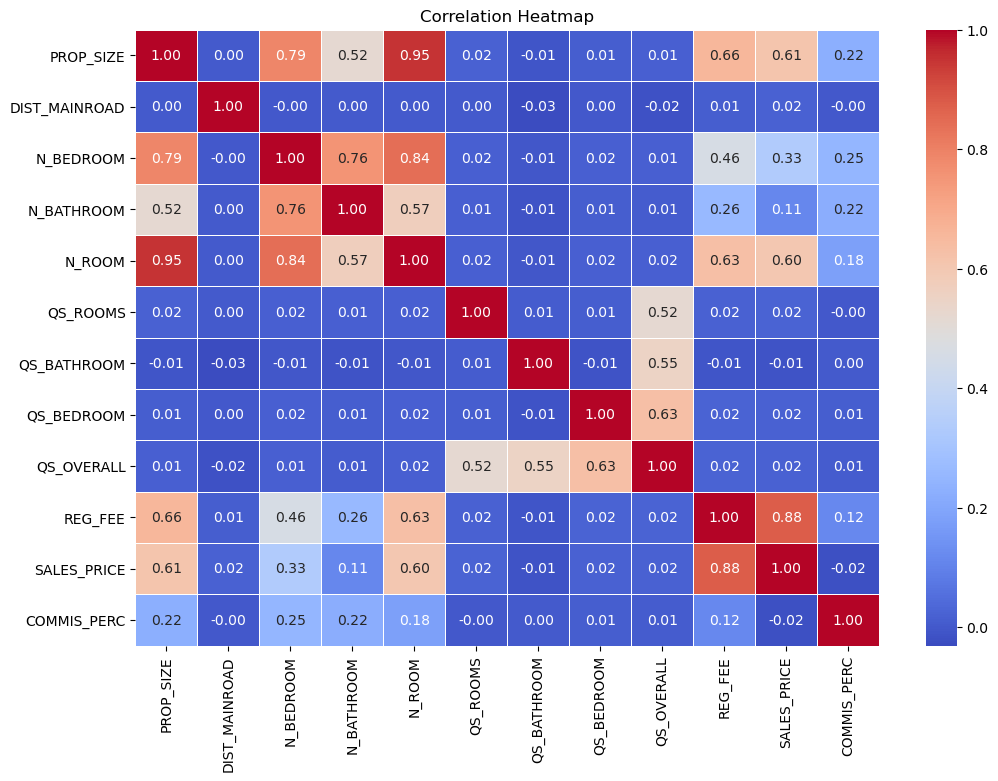

In [16]:
# checking for correlation
correlation_matrix = data[['PROP_SIZE','DIST_MAINROAD','N_BEDROOM','N_BATHROOM',
                    'N_ROOM','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL',
                    'REG_FEE','SALES_PRICE','COMMIS_PERC']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

* PROP_SIZE has strong correlation with (N_ROOM,N_BEDROOM,N_BATHROOM , REG_FEE,SALES_PRICE) which does make sense
* all QS are linked to each other 
* REG_REE and SALES_PRICE has a very strong correlation 
* but in the other hand we can see that DIST_MAINROAD  has no correlation with any of the features.


#### Relationships with PairPlot:
the pairplot let us see the relationship accross all features .Here is the code.

/Users/shikarichacha/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:64: UserWarning:

The figure layout has changed to tight



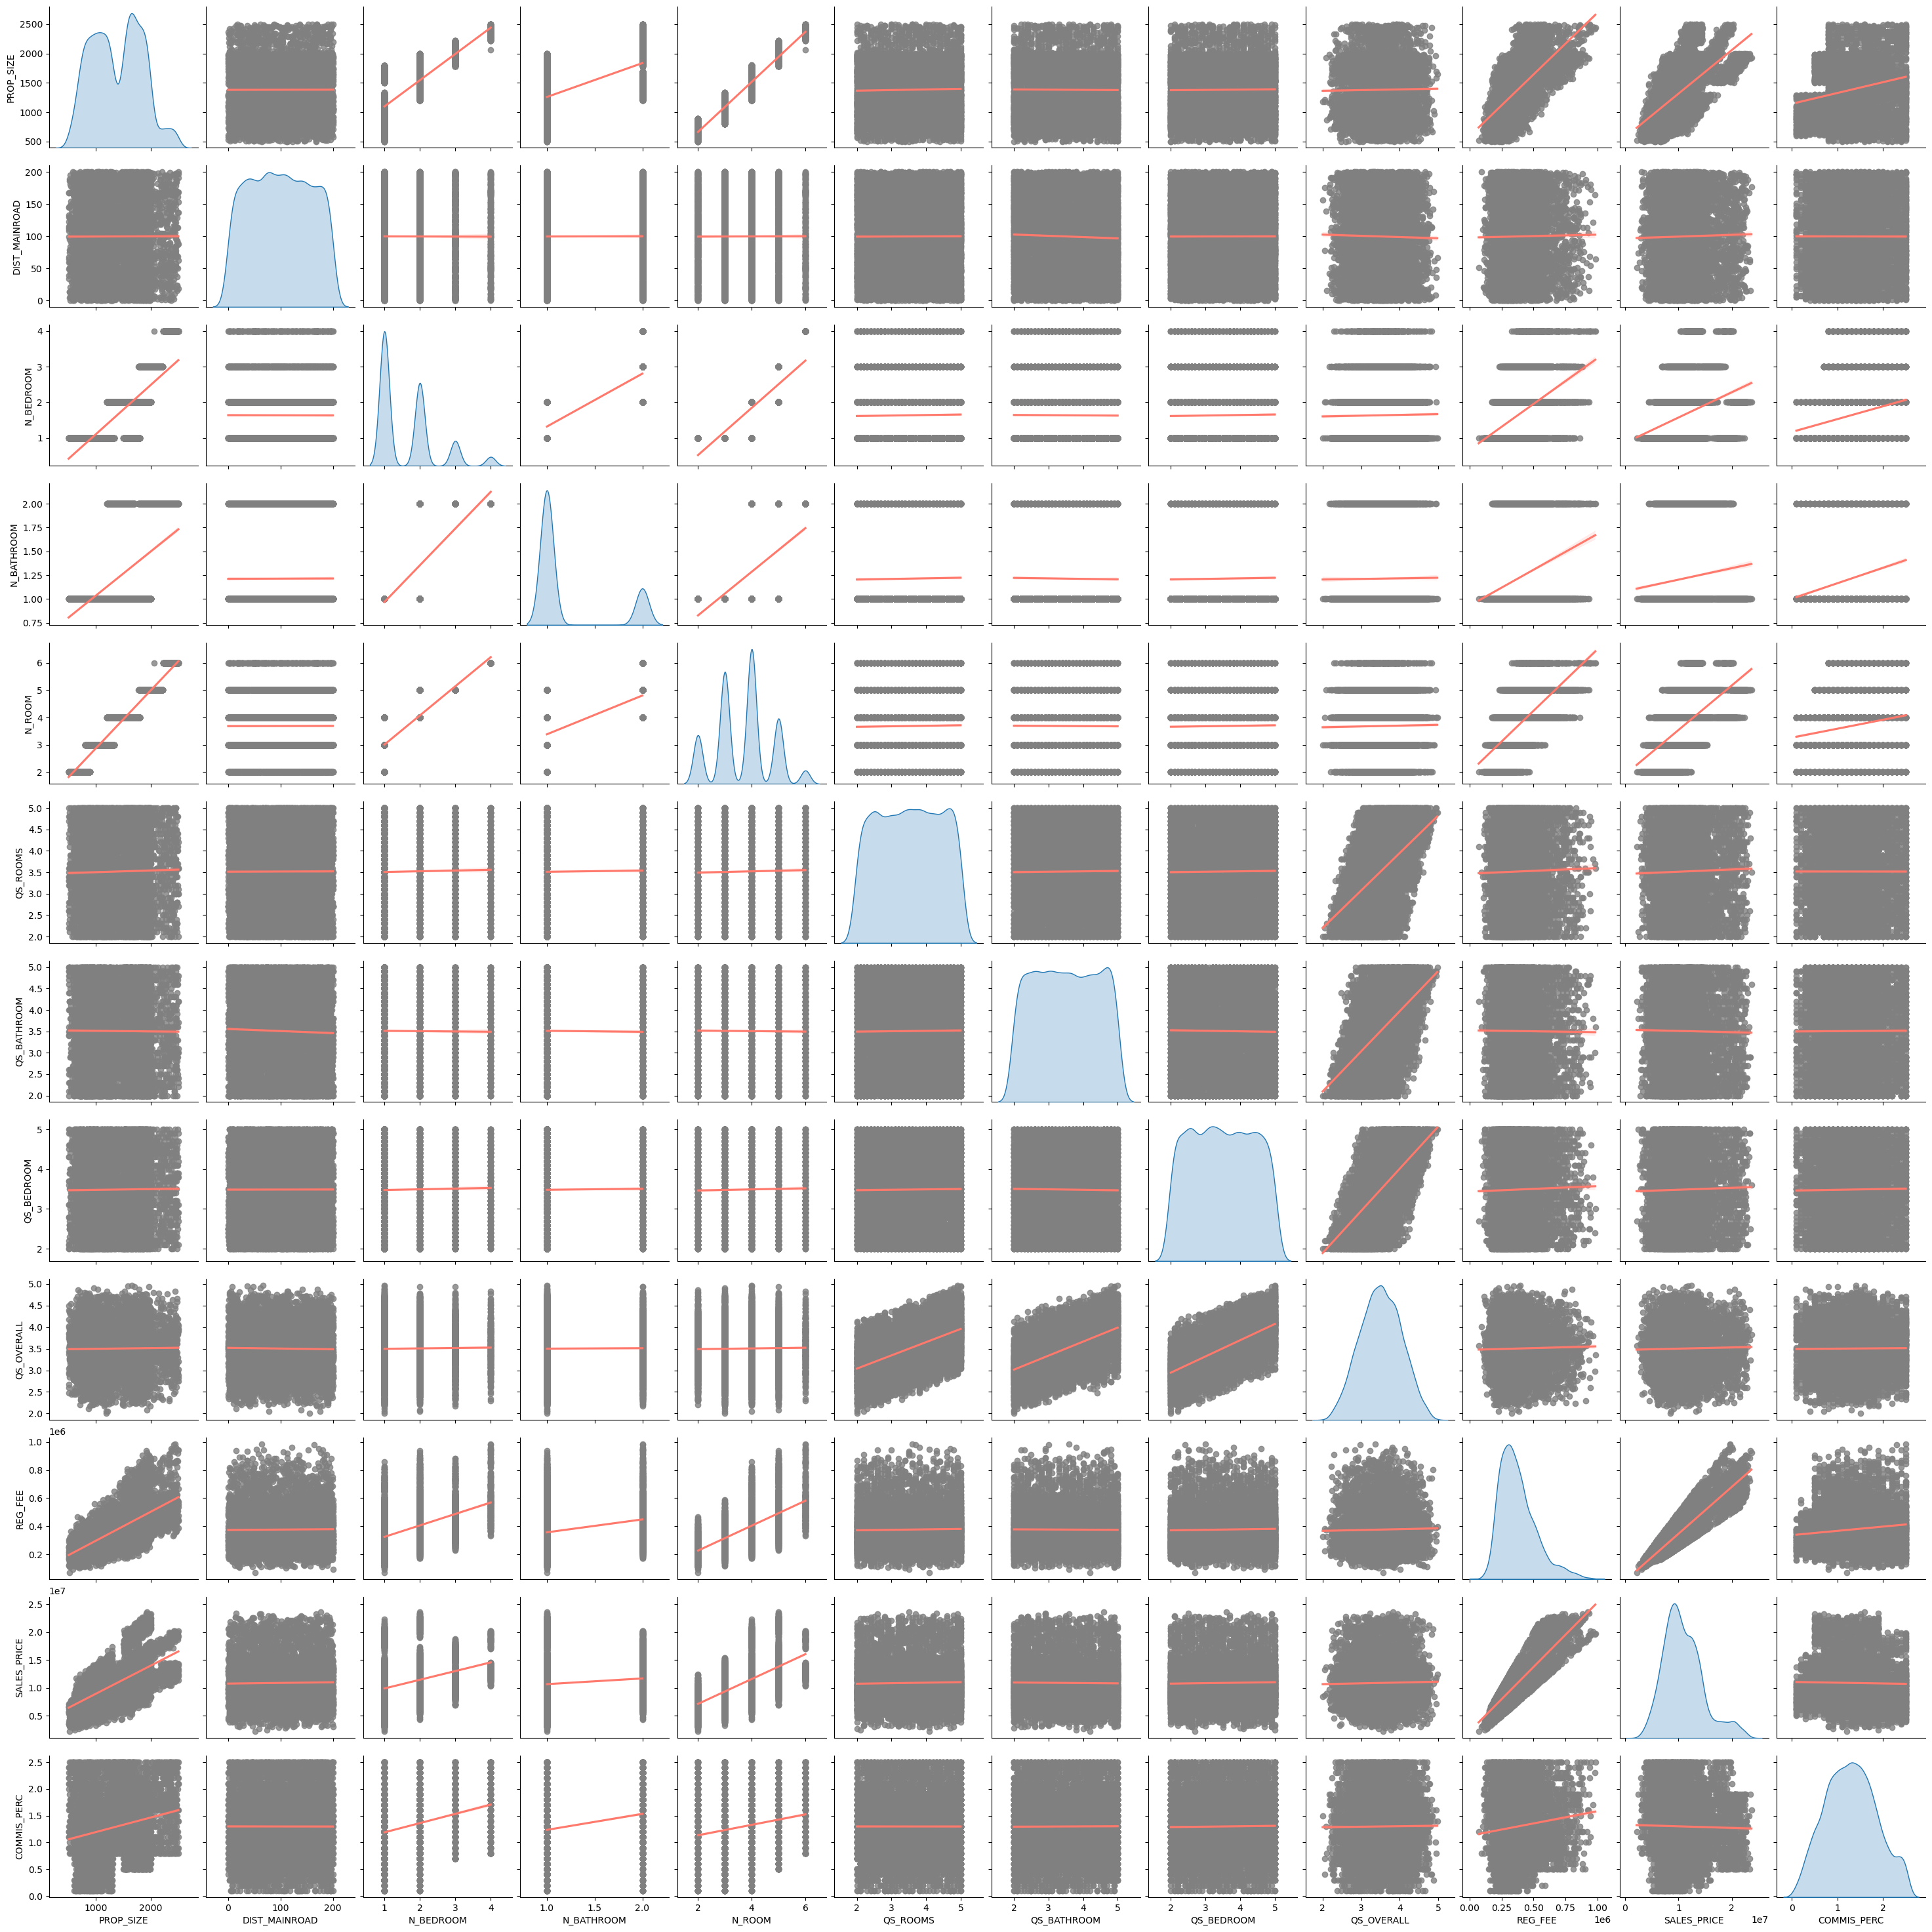

In [17]:
# let's confirm the results with paireplot 

sns.pairplot(data ,
            diag_kind='kde',kind='reg',
            plot_kws={'color':'xkcd:salmon',
                      'scatter_kws':{'color':'gray'}
                      }
            )

In [18]:
#checking the distribution for each feature , we are using here KS-test

numeric_data = data.select_dtypes(include=['number'])
for column in numeric_data.columns:
  statistic, p_value = kstest(data[column], 'norm', args=(data[column].mean(), data[column].std()))
  print(f'the distribution of the {column} feature')
  print('the Statistc value : ',statistic)
  print('the p-value : ',p_value)
  print(' ')

the distribution of the PROP_SIZE feature
the Statistc value :  0.06612489454544423
the p-value :  2.874584654388059e-27
 
the distribution of the DIST_MAINROAD feature
the Statistc value :  0.060320583297378993
the p-value :  9.251881934852846e-23
 
the distribution of the N_BEDROOM feature
the Statistc value :  0.3205942492545987
the p-value :  0.0
 
the distribution of the N_BATHROOM feature
the Statistc value :  0.4854686623254597
the p-value :  0.0
 
the distribution of the N_ROOM feature
the Statistc value :  0.19109202327782787
the p-value :  3.990041201720813e-226
 
the distribution of the QS_ROOMS feature
the Statistc value :  0.07389459158182454
the p-value :  5.947878321770727e-34
 
the distribution of the QS_BATHROOM feature
the Statistc value :  0.076373139242216
the p-value :  3.05721871563372e-36
 
the distribution of the QS_BEDROOM feature
the Statistc value :  0.07440391119741446
the p-value :  2.0425777778615627e-34
 
the distribution of the QS_OVERALL feature
the Sta

In [19]:
from sklearn.preprocessing import PowerTransformer


# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
transformed_data = pt.fit_transform(numeric_data)

# Create a DataFrame with the transformed data
transformed_data = pd.DataFrame(transformed_data, columns=numeric_data.columns)

# re-applying KS-test
for column in transformed_data.columns:
  statistic, p_value = kstest(data[column], 'norm', args=(data[column].mean(), data[column].std()))
  print(f'the distribution of the {column} feature')
  print('the Statistc value : ',statistic)
  print('the p-value : ',p_value)
  print(' ')

the distribution of the PROP_SIZE feature
the Statistc value :  0.06612489454544423
the p-value :  2.874584654388059e-27
 
the distribution of the DIST_MAINROAD feature
the Statistc value :  0.060320583297378993
the p-value :  9.251881934852846e-23
 
the distribution of the N_BEDROOM feature
the Statistc value :  0.3205942492545987
the p-value :  0.0
 
the distribution of the N_BATHROOM feature
the Statistc value :  0.4854686623254597
the p-value :  0.0
 
the distribution of the N_ROOM feature
the Statistc value :  0.19109202327782787
the p-value :  3.990041201720813e-226
 
the distribution of the QS_ROOMS feature
the Statistc value :  0.07389459158182454
the p-value :  5.947878321770727e-34
 
the distribution of the QS_BATHROOM feature
the Statistc value :  0.076373139242216
the p-value :  3.05721871563372e-36
 
the distribution of the QS_BEDROOM feature
the Statistc value :  0.07440391119741446
the p-value :  2.0425777778615627e-34
 
the distribution of the QS_OVERALL feature
the Sta

Ok ,we need first to reshape the data in a way that fits the test's input.

In [20]:
# choosing only the numeric data and including the AREA to the new data frame
numeric_data = data.select_dtypes(include=['number'])
numeric_data['AREA'] = data['AREA']

for column in numeric_data.columns:
  grouped_data = [group[column].values for name, group in numeric_data.groupby("AREA")]

  # Perform the Kruskal-Wallis test
  stat, p_value = kruskal(*grouped_data)

  print(f'The results for the feature {column}')
  print(f"Kruskal-Wallis H-statistic: {stat}")
  print(f"P-value: {p_value}")
  print(' ')
  

The results for the feature PROP_SIZE
Kruskal-Wallis H-statistic: 5040.942752593923
P-value: 0.0
 
The results for the feature DIST_MAINROAD
Kruskal-Wallis H-statistic: 12.840645642454518
P-value: 0.04563746881763645
 
The results for the feature N_BEDROOM
Kruskal-Wallis H-statistic: 3906.1851416615345
P-value: 0.0
 
The results for the feature N_BATHROOM
Kruskal-Wallis H-statistic: 1904.2002526542199
P-value: 0.0
 
The results for the feature N_ROOM
Kruskal-Wallis H-statistic: 4416.073537958922
P-value: 0.0
 
The results for the feature QS_ROOMS
Kruskal-Wallis H-statistic: 4.599186189009769
P-value: 0.5961467338824105
 
The results for the feature QS_BATHROOM
Kruskal-Wallis H-statistic: 2.117101626664191
P-value: 0.9086197302401269
 
The results for the feature QS_BEDROOM
Kruskal-Wallis H-statistic: 4.018506266082137
P-value: 0.674171883249915
 
The results for the feature QS_OVERALL
Kruskal-Wallis H-statistic: 5.005437200448569
P-value: 0.5431159422848648
 
The results for the featur

In [21]:
# first let's see the count of each type of the AREA feature
area_data = data.groupby('AREA').size()

fig = go.Figure()
fig.add_trace(go.Bar(x=area_data.index, y=area_data.sort_values(ascending=False)))
fig.update_layout(
    title='Count of Properties By AREA',
    xaxis_title='AREA',
    yaxis_title='Count',
    height=600
)
fig.show()

In [22]:
prop_mean_size = data.groupby('AREA')['PROP_SIZE'].mean()
trace1 = go.Bar(x=prop_mean_size.index, y=prop_mean_size.values, name='PROP_SIZE')
fig = go.Figure(data=trace1)

fig.update_layout(
    title='Mean Properties size by Area',
    xaxis_title='Area',
    yaxis_title='size',
    barmode='group',
    height=600,
    legend_title='Features'
)
fig.show()

In [23]:
prop_area = data.groupby('AREA')[['SALES_PRICE','REG_FEE']].mean()

trace1 = go.Bar(x=prop_area.index, y=prop_area['SALES_PRICE'], name='SALES_PRICE')
trace2 = go.Bar(x=prop_area.index, y=prop_area['REG_FEE'], name='REG_FEE')

# Create figure
fig = go.Figure(data=[trace1, trace2])

# Update layout
fig.update_layout(
    title='Features by Area',
    xaxis_title='Area',
    yaxis_title='mean values',
    barmode='group',
    height=600,
    legend_title='Features'
)
fig.show()

In [24]:
prop_mean_value = data.groupby('AREA')[['N_ROOM','QS_OVERALL','COMMIS_PERC']].mean()

trace1 = go.Bar(x=prop_mean_value.index, y=prop_mean_value['N_ROOM'], name='N_ROOM')
trace2 = go.Bar(x=prop_mean_value.index, y=prop_mean_value['QS_OVERALL'], name='QS_OVERALL')
trace3 = go.Bar(x=prop_mean_value.index, y=prop_mean_value['COMMIS_PERC'], name='COMMIS_PERC')

# Create figure
fig = go.Figure(data=[trace1, trace2, trace3])

# Update layout
fig.update_layout(
    title='Features by Area',
    xaxis_title='Area',
    yaxis_title='mean values',
    barmode='group',
    height=600,
    legend_title='Features'
)
fig.show()

#### Time Effect:
Let's check properties behave across time.

We need to get the age of each property

In [25]:
data['PROP_AGE'] = data ['DATE_SALE']- data['DATE_BUILD']
data['PROP_AGE'] = (data['PROP_AGE'].dt.days / 365.25).round().astype(int)
data['PROP_AGE'].head()

3050    54
4943    51
5284    45
5757    52
2360    51
Name: PROP_AGE, dtype: int64

In [26]:
# Calculate mean property age by area
prop_mean_age = data.groupby('AREA')['PROP_AGE'].mean().astype(int).sort_values(ascending=False)

# Create the bar chart trace for property age
trace = go.Bar(x=prop_mean_age.index, y=prop_mean_age.values, name='PROP_AGE')

fig = go.Figure(data=trace)

# Update the layout if needed
fig.update_layout(
    title='Features by Area',
    xaxis_title='Area',
    yaxis_title='Mean Values',
    barmode='group',
    height=600,
    legend_title='Features'
)

# Show the updated figure
fig.show()

Let's see the variation of price per Age.

We need first to create AGE ranges 

In [27]:
bins = [0, 10, 20, 30, 40, float('inf')]
labels = ['0-10', '11-20', '21-30', '31-40', '40+']

# Create the age range category
data['AGE_RANGE'] = pd.cut(data['PROP_AGE'], bins=bins, labels=labels, right=False)

age_range_counts = data.groupby('AGE_RANGE').size().sort_values(ascending=False)

# Create the bar chart
fig = px.bar(
    age_range_counts,
    x=age_range_counts.index,
    y=age_range_counts.values,
    title='Count of Property Age Ranges',
    barmode='group',
    height=600
)
fig.show()

In [28]:
# Price by Age range
age_range_price = data.groupby('AGE_RANGE')['SALES_PRICE'].mean()

# Create the bar chart
fig = px.bar(
    age_range_price,
    x=age_range_price.index,
    y=age_range_price.values,
    title='Mean Price of Property Age Ranges',
    barmode='group',
    height=600
)
fig.show()

Let's see if the variation of price by age range is significant .for that we will the same as we did before by applying kruskal test 

In [29]:
grouped_data = [group['SALES_PRICE'].values for name, group in data.groupby("AGE_RANGE")]

# Perform the Kruskal-Wallis test
stat, p_value = kruskal(*grouped_data)

print(f'The results for the feature AGE_RANGE')
print(f"Kruskal-Wallis H-statistic: {stat}")
print(f"P-value: {p_value}")
print(' ')

The results for the feature AGE_RANGE
Kruskal-Wallis H-statistic: 118.5841356412786
P-value: 1.0716236851365241e-24
 


**Note :** We can see that the variation is significant soo , Age factor does make the difference in the price

Let's check the evolution of buildings count across different regions over time 

In [30]:
prop_count = data.groupby('AREA').size().sort_values(ascending=False)
fig = px.bar(prop_count,prop_count.index,prop_count.values)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Count of Buildings',
    height=600
)

fig.show()

We need to make a time series for properties count in different AREAs.

In [31]:
data['YEAR_BUILD'] = (data['DATE_BUILD'].dt.year // 10)*10
prop_count = data.groupby(['AREA', 'YEAR_BUILD']).size().reset_index(name='count')

fig = px.line(prop_count, x='YEAR_BUILD', y='count', color='AREA',
            title='Evolution of Building Count every 10 years by Area',markers=True)
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Count of Buildings',
    height=600
)

fig.show()

We can see from the chart that the building rate has reached its peak in 1970-1990 ,where AREAs like **chrompet** had a significant growth from 35 in to 414 buildings in 1970 ,and the numbers kept growing for the next 20 years which makes it one of the largest AREAs at that point.

Let's see how the sales rate is going over time.

In [32]:
data['YEAR_SALE'] = (data['DATE_SALE'].dt.year // 1)*1
prop_count = data.groupby(['AREA', 'YEAR_SALE']).size().reset_index(name='count')

fig = px.line(prop_count, x='YEAR_SALE', y='count', color='AREA',
            title='Evolution of Building Count over time by Area',markers=True)
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Count of Buildings in sale',
    height=600
)

fig.show()